# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

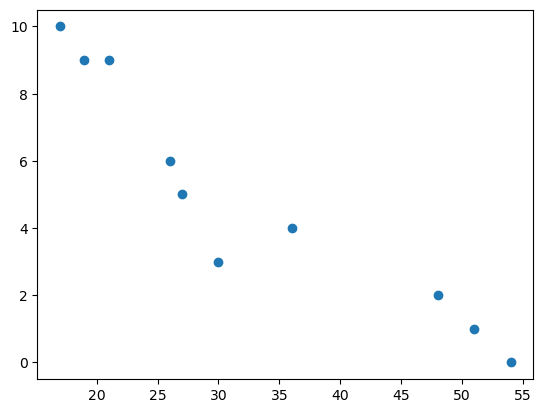

In [5]:
x = student_data["Age"]
y = student_data["Tardies"]

plt.scatter(x, y)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

The line goes down expressing that students that have higher ages are more puntcual. There is a negative correlation.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
covariance = np.cov(x, y)
print(f"Covariance: {covariance}") # The diagonal values are the variances and the off-diagonal values are the covariances.
correlation = np.corrcoef(x, y)
print(f"Correlation: {correlation}") # Values range between -1 and 1.

""" The covariance is negative, meaning that as one variable (age) increases, the other (tardies) decreases"""
""" The correlation is strong negative (it's closer to -1), reassuring the same thing"""

Covariance: [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]
Correlation: [[ 1.         -0.93916269]
 [-0.93916269  1.        ]]


" The correlation is strong negative (it's closer to -1), reassuring the same thing"

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Step 1: Load the data 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

# Step 2: Prepare and reshape the data
x = student_data["Age"].values.reshape(-1, 1) # Transform the pandas series into a 2D numpy array (a matrix)
y = student_data["Tardies"].values # Leave it as 1D numpy array (a vector) 

# Step 3: Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Step 4: Check sizes
print(x.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# Step 5: Create the (empty) linear regression model
model = LinearRegression()

# Step 6: Fit the model to the training data
model.fit(X_train, y_train)

# Step 7: The model is trained, now ask him to predict tardies based on the (new) testing data (age). Store the predictions into a variable
y_pred = model.predict(X_test)

# Step 8: Calculate the linear regression equation: y = intercept + (coefficient * x)
print(f"Intecept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")
""" Intercept (12.7): When the age is 0, the predicted number of tardies would be 12.7

Coefficient (-0.24): If the coefficient is negative, it means that as Age increases, the number of tardies decreases. 
For each year increase in age, the number of tardies will decrease by 0.24.

EQUATION: If age is 30, predicted number of tardies is: 12.7 + (-0.24 * 30) = 5.7 """

# Step 9: Evaluate the model
    # Calculate Mean Squared Error (MSE): how wrong the model's predictions are (0 means is predicting perfectly)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
    # Calculate R-squared score: how well the model is doing overall (100% is perfect score, 0 means the model is guessing randomly)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


(10, 1) (8, 1) (2, 1)
(10,) (8,) (2,)
Intecept: 13.380960791239845
Coefficient: [-0.25609325]
Mean Squared Error: 1.490657598089277
R-squared score: 0.3374855119603214


Plot your regression model on your scatter plot.

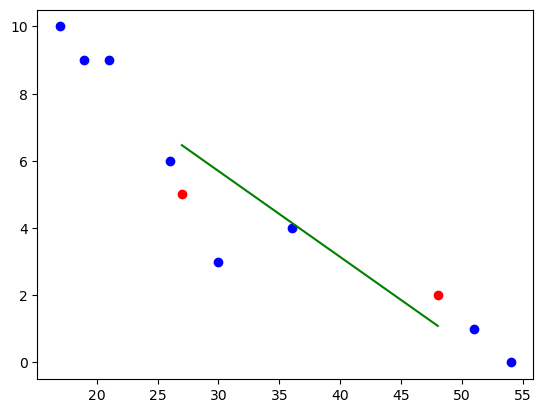

In [9]:
plt.scatter(X_train, y_train, color="blue") # Students from the training data
plt.scatter(X_test, y_test, color="red") # Students from the testing data
plt.plot(X_test, y_pred, color="green") # Regression line (model's prediction for the testing data)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

 There is a negative relationship between age and tardiness so, in simple terms, as students get older, they tend to have fewer tardies. The model is doing a good job predicting the number of tardies based on age.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("C:\\Users\\crvid\\Documents\\IRONHACK\\WEEK_4\\DAY3\\lab-regression-analysis-en\\vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:
# Select the variables we are using for the analysis
variables_analysis = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]

# Calculate the correlation between all the variables
correlation = variables_analysis.corr()
correlation

""" The correlation between each variable and the CO2 Emissions show that vehicles that use more fuel barrels per year and that have more cylinders 
tend to emit more CO2 (positive correlation). There is a negative correlation between MPG nad CO2 emissions meaning that vehicles that have
better fuel efficiency tend to emit less C02. The year correlation is not really significant"""

' The correlation between each variable and the CO2 Emissions show that vehicles that use more fuel barrels per year and that have more cylinders \ntend to emit more CO2 (positive correlation). There is a negative correlation between MPG nad CO2 emissions meaning that vehicles that have\nbetter fuel efficiency tend to emit less C02. The year correlation is not really significant'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Step 1: Select the relevant columns (independent and dependent variables)
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]  # Independent variables
y = vehicles['CO2 Emission Grams/Mile']  # Dependent variable (what we want to predict)

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 3: Create the linear regression model
model = LinearRegression()

# Step 4: Train (fit) the model on the training data
model.fit(X_train, y_train)

# Step 5: Predict CO2 emissions using the testing data
y_pred = model.predict(X_test)

# Step 6: Get the intercept and coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Step 7: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error (MSE)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
print(f"R-squared Score: {r2}")

Intercept: 792.0343122416474
Coefficients: [-0.33035703  1.98534185 18.88828544 -3.10932813  0.03285214]
Mean Squared Error: 243.00026537713367
R-squared Score: 0.9828805577779606


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

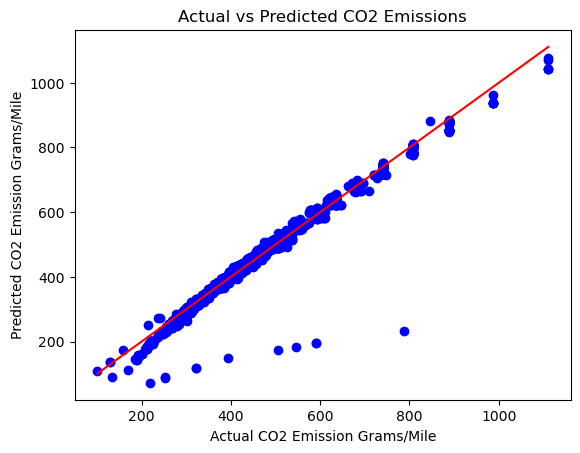

In [13]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel('Actual CO2 Emission Grams/Mile')
plt.ylabel('Predicted CO2 Emission Grams/Mile')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [27]:
x = [1, 3, 4, 6, 8, 9, 11, 14]
y = [1, 2, 4, 4, 5, 7, 8, 13]

party = pd.DataFrame({"invited":x, "attended": y})
party

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [75]:
# BUILD A MODEL

# Step 2: Prepare and reshape the data
x = party["invited"].values.reshape(-1, 1) # Transform the pandas series into a 2D numpy array (a matrix)
y = party["attended"].values # Leave it as 1D numpy array (a vector) 

# Step 3: Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Step 4: Check sizes
print(x.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# Step 5: Create the (empty) linear regression model
model = LinearRegression()

# Step 6: Fit the model to the training data
model.fit(X_train, y_train)

# Step 7: The model is trained, now ask him to predict tardies based on the (new) testing data (age). Store the predictions into a variable
y_pred = model.predict(X_test)

(8, 1) (6, 1) (2, 1)
(8,) (6,) (2,)


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

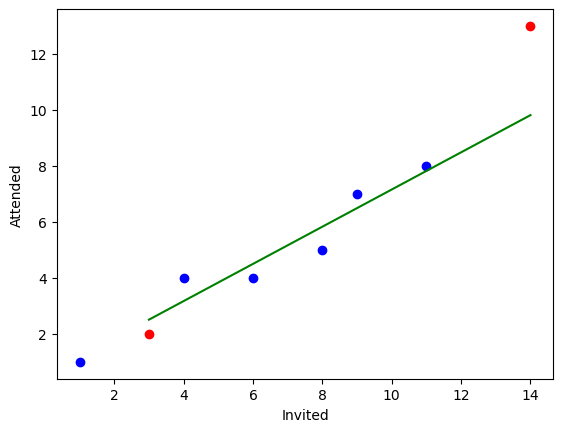

In [79]:
plt.scatter(X_train, y_train, color="blue") # People from the training data
plt.scatter(X_test, y_test, color="red") # People from the testing data
plt.plot(X_test, y_pred, color="green") # Regression line (model's prediction for the testing data)
plt.xlabel("Invited")
plt.ylabel("Attended")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [31]:
# There is a positive correlation between the two features: as the number of invited people increases, the number of attends generally increases as well.

# There are no significant outliers

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [77]:
# Step 6: Get the intercept and coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Step 7: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error (MSE)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
print(f"R-squared Score: {r2}")

Intercept: 0.5165394402035615
Coefficients: [0.66412214]
Mean Squared Error: 5.203996141121017
R-squared Score: 0.8279670697150077


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# The intercept doesn't make sense in this example because we can't have half people attending when x = 0. Even when no one is invited, 0.52 person might attend.

# The coefficient shows that for every additional person invited, about 0.66 people are expected to attend, so not everyone invited will attend.

# Mean Squared Error is high, meaning that the model isn't accurate in predicting the attendance

# R-squared score is quite high meaning that the model does a good job in predicting 